# EU classification system for green investments – feedback review

Few descriptive staticstics of the feedback received to the EC [consultation](https://ec.europa.eu/info/law/better-regulation/have-your-say/initiatives/12302-Climate-change-mitigation-and-adaptation-taxonomy) on the new taxonomy of sustainable finance.

Covers only metadata such as type of subject (company, NGO, association, etc.) posting the feedback or country of origin.

This consultation is unique as lot of the feedback has been generated by a NGO campaing [Stop Fake Green](https://www.stopfakegreen.eu/).

Some of the plots are therefore prepared separately for feedback generated by the campaing and the rest. The campaign generated feedback is identified simpy by a sentence from the generic response (There migh be feedback wrongly attributed as not coming from the campaign if respondents choosen to adjust the generic response.).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('taxonomy.csv', low_memory=False)

In [2]:
df = df.fillna('n/a')

In [3]:
df.columns

Index(['ersFileName', 'firstName', 'tr_number', 'publicationId',
       'dateFeedback', 'status', 'organization', 'governanceLevel', 'id',
       'scope', 'isMyFeedback', 'userType', 'surname', 'publication',
       'referenceInitiative', 'language', 'country', 'companySize',
       'attachmentUrl', 'feedback'],
      dtype='object')

In [4]:
df.shape

(11772, 20)

In [5]:
df = df[['id', 'publicationId', 'status', 'dateFeedback',
'country', 'language', 'userType', 'firstName', 'surname',
'referenceInitiative', 'organization', 'companySize', 'attachmentUrl',
'feedback']]

In [6]:
pd.set_option('display.max_colwidth', 50)

In [7]:
df.head()

,id,publicationId,status,dateFeedback,country,language,userType,firstName,surname,referenceInitiative,organization,companySize,attachmentUrl,feedback
0,1319042,16015203,PUBLISHED,2020/12/17 11:47:51,SVN,EN,EU_CITIZEN,Borut,Petkovšek,Ares(2020)6979284,n/a,n/a,n/a,Dear President von der Leyen \nExecutive Vice ...
1,1319041,16015203,PUBLISHED,2020/12/17 11:47:27,SVN,EN,EU_CITIZEN,Borut,Petkovšek,Ares(2020)6979284,n/a,n/a,n/a,Dear President von der Leyen \nExecutive Vice ...
2,1319040,16015203,PUBLISHED,2020/12/17 11:46:08,SVN,EN,EU_CITIZEN,Borut,Petkovšek,Ares(2020)6979284,n/a,n/a,n/a,Dear President von der Leyen \nExecutive Vice ...
3,1319039,16015203,PUBLISHED,2020/12/17 11:44:08,ITA,EN,COMPANY,Elia,Gosparini,Ares(2020)6979284,I.Blu srl,LARGE,https://ec.europa.eu/info/law/better-regulatio...,In this advisory statement we would like to dr...
4,1319038,16015203,PUBLISHED,2020/12/17 11:43:50,SVN,EN,EU_CITIZEN,Borut,Petkovšek,Ares(2020)6979284,n/a,n/a,https://ec.europa.eu/info/law/better-regulatio...,Dear President von der Leyen \nExecutive Vice ...


## Whole feedback

### Feedback by subject type

In [8]:
df['userType'].value_counts()

EU_CITIZEN                        11229
n/a                                 302
COMPANY                              90
BUSINESS_ASSOCIATION                 60
NGO                                  38
OTHER                                16
NON_EU_CITIZEN                       10
ACADEMIC_RESEARCH_INSTITTUTION       10
ENVIRONMENTAL_ORGANISATION            8
PUBLIC_AUTHORITY                      7
TRADE_UNION                           2
Name: userType, dtype: int64

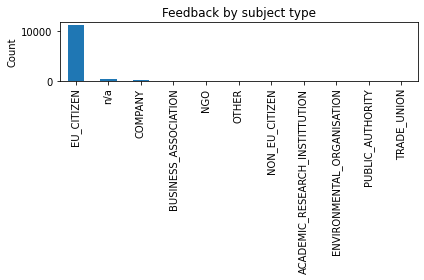

In [9]:
ax = df['userType'].value_counts().plot(
    kind='bar',
    title='Feedback by subject type',
    ylabel='Count',
    )
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('user.png')

### Feedback by country


In [10]:
df['country'].value_counts()

DEU    4226
FRA    4043
ESP     990
ITA     713
BEL     601
n/a     302
AUT     243
NLD     123
CHE     114
SWE     102
SVN      32
PRT      27
GBR      27
LUX      24
IRL      21
FIN      21
POL      19
DNK      15
GRC      13
HUN      12
ROU      11
CZE      10
USA       8
NOR       7
CAN       7
SRB       5
SVK       4
AND       4
MLT       4
LTU       4
JPN       3
DJI       3
BRA       3
SMR       2
NZL       2
GRD       2
FJI       2
ECU       2
GTM       2
ALB       2
CAF       2
MNE       2
EST       1
BGR       1
MKD       1
GUF       1
ALA       1
PHL       1
BIH       1
SYC       1
KOR       1
LVA       1
DMA       1
ZAF       1
UKR       1
Name: country, dtype: int64

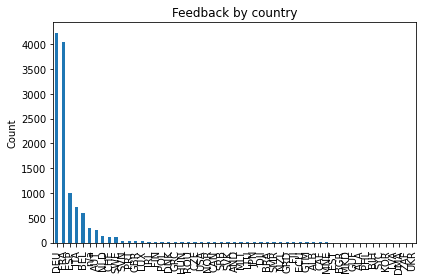

In [11]:
ax = df['country'].value_counts().plot(
    kind='bar',
    title='Feedback by country',
    ylabel='Count',
    )
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('country.png')

### Feedback by subject company size


In [12]:
df['companySize'].value_counts()

n/a       11541
MICRO        69
LARGE        68
SMALL        53
MEDIUM       41
Name: companySize, dtype: int64

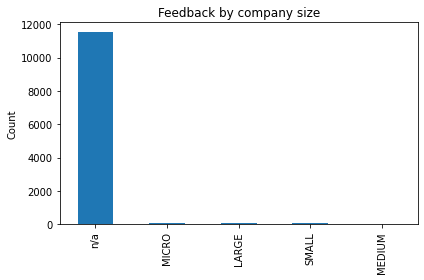

In [13]:
ax = df['companySize'].value_counts().plot(
    kind='bar',
    title='Feedback by company size',
    ylabel='Count',
    )
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('company_size.png')

## Only NGO campaign feedback
Identified by a single sentence 'The criteria on bioenergy are far too weak and will encourage things that increase emissions' from the generic response.

In [14]:
ngo_campain = df['feedback'].str.contains('The criteria on bioenergy are far too weak and will encourage things that increase emissions')
ngo_campain.value_counts()

True     10919
False      853
Name: feedback, dtype: int64

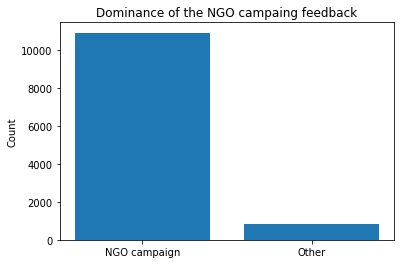

In [15]:
plt.bar(['NGO campaign', 'Other'], ngo_campain.value_counts())
plt.title('Dominance of the NGO campaing feedback')
plt.ylabel('Count')
plt.savefig('dominance_campaign.png')

In [16]:
df[ngo_campain]['userType'].value_counts()

EU_CITIZEN    10915
n/a               4
Name: userType, dtype: int64

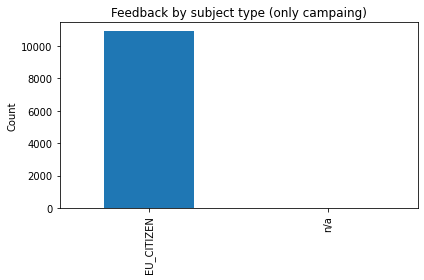

In [17]:
ax = df[ngo_campain]['userType'].value_counts().plot(
    kind='bar',
    title='Feedback by subject type (only campaing)',
    ylabel='Count',
    )
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('user_only_campain.png')

In [18]:
df[ngo_campain]['country'].value_counts()

DEU    4199
FRA    3905
ESP     975
ITA     645
BEL     534
AUT     237
CHE     111
NLD      75
SVN      29
PRT      25
LUX      23
SWE      18
GBR      15
DNK      14
IRL      13
POL      12
GRC      12
HUN      10
FIN       9
USA       6
SRB       5
CAN       5
n/a       4
AND       4
ROU       3
SVK       3
DJI       3
MLT       3
GTM       2
NZL       2
SMR       2
LTU       2
CAF       2
FJI       2
BRA       2
GRD       2
ECU       2
JPN       1
ZAF       1
SYC       1
DMA       1
Name: country, dtype: int64

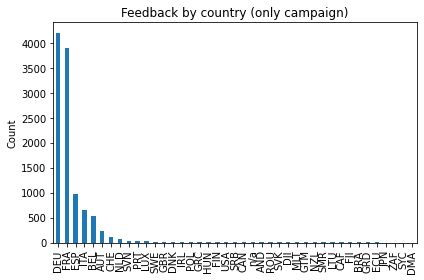

In [19]:
ax = df[ngo_campain]['country'].value_counts().plot(
    kind='bar',
    title='Feedback by country (only campaign)',
    ylabel='Count',
    )
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('country_only_campaign.png')

## Without feedback from the NGO campain

Text(0, 0.5, 'Count')

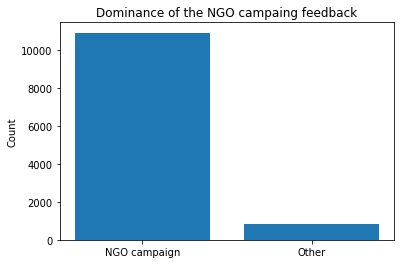

In [20]:
plt.bar(['NGO campaign', 'Other'], ngo_campain.value_counts())
plt.title('Dominance of the NGO campaing feedback')
plt.ylabel('Count')

### Feedback by subject type

In [21]:
df[~ngo_campain]['userType'].value_counts()

EU_CITIZEN                        314
n/a                               298
COMPANY                            90
BUSINESS_ASSOCIATION               60
NGO                                38
OTHER                              16
NON_EU_CITIZEN                     10
ACADEMIC_RESEARCH_INSTITTUTION     10
ENVIRONMENTAL_ORGANISATION          8
PUBLIC_AUTHORITY                    7
TRADE_UNION                         2
Name: userType, dtype: int64

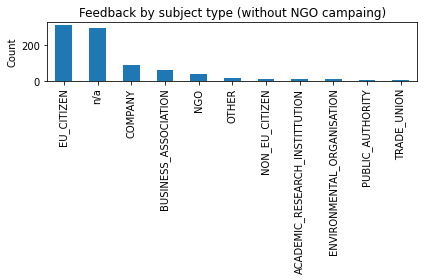

In [22]:
ax = df[~ngo_campain]['userType'].value_counts().plot(
    kind='bar',
    title='Feedback by subject type (without NGO campaing)',
    ylabel='Count',
    )
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('user_without_campain.png')

### Feedback by country

In [23]:
df[~ngo_campain]['country'].value_counts()

n/a    298
FRA    138
SWE     84
ITA     68
BEL     67
NLD     48
DEU     27
ESP     15
FIN     12
GBR     12
CZE     10
ROU      8
IRL      8
NOR      7
POL      7
AUT      6
SVN      3
CHE      3
PRT      2
USA      2
CAN      2
JPN      2
LTU      2
HUN      2
ALB      2
MNE      2
ALA      1
MKD      1
KOR      1
GRC      1
EST      1
SVK      1
DNK      1
PHL      1
UKR      1
GUF      1
BGR      1
BIH      1
LUX      1
MLT      1
LVA      1
BRA      1
Name: country, dtype: int64

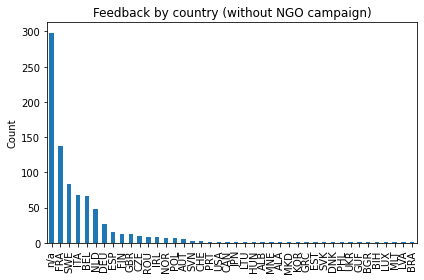

In [24]:
ax = df[~ngo_campain]['country'].value_counts().plot(
    kind='bar',
    title='Feedback by country (without NGO campaign)',
    ylabel='Count',
    )
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('country_without_campaign.png')

In [25]:
df[~ngo_campain]['companySize'].value_counts()

n/a       622
MICRO      69
LARGE      68
SMALL      53
MEDIUM     41
Name: companySize, dtype: int64

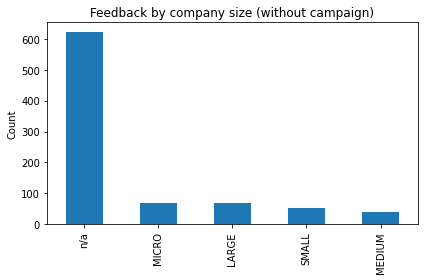

In [26]:
ax = df[~ngo_campain]['companySize'].value_counts().plot(
    kind='bar',
    title='Feedback by company size (without campaign)',
    ylabel='Count',
    )
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('company_size_without_campaign.png')

In [27]:
df.to_excel('taxonomy_export.xlsx')

In [28]:
df.to_csv('taxonomy_export.csv')